# KNN Tuning

In [17]:
from scipy.spatial import distance
from sklearn.model_selection import train_test_split

from assignment_2.digits_classifiers.model import Dataset, ClassifierTuning
from assignment_2.digits_classifiers.classifiers import KNN
from assignment_2.digits_classifiers.io import read_datasets

## Import dataset

In [18]:
data = read_datasets()

2022-12-14 15:22:38.801 | INFO     | assignment_2.digits_classifiers.io:read_datasets:40 - Reading datasets


In [19]:
X, y = data

## Removing constant columns

In [20]:
always_zero = [c for c in list(X.columns) if sum(X.loc[:, c]) == 0]

In [21]:
X.drop(columns=always_zero, axis=1, inplace=True)

## Discard part of data

In [22]:
X, _, y, _ = train_test_split(X, y, test_size=0.95)

## Train Test split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

In [24]:
X_train

,pixel13,pixel14,pixel15,pixel16,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
data = Dataset(x=X, y=y)
train = Dataset(x=X_train, y=y_train)
test = Dataset(x=X_test, y=y_test)

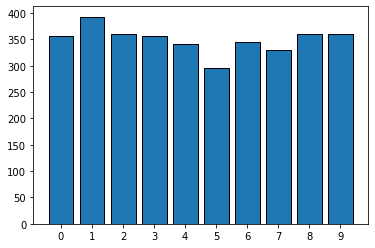

In [26]:
data.digit_distribution()

## Training KNN

In [27]:
knns = [
    KNN(train=train, test=test, k=k, distance_fun=distance.euclidean)
    for k in [10]
]

In [28]:
tuning_knns = ClassifierTuning(classifiers=knns, data=train, k=3)

In [29]:
tuning_knns.evaluate_best_model()

2022-12-14 15:22:49.063 | INFO     | assignment_2.digits_classifiers.model:evaluate_best_model:298 - Evaluating classifier: [k-NEAREST-NEIGHBORHOOD: Train 2800, Test 700] - [K: 10]
2022-12-14 15:22:49.109 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 1
2022-12-14 15:22:49.110 | INFO     | assignment_2.digits_classifiers.classifiers:predict:284 -  > 0.000%
2022-12-14 15:22:50.747 | INFO     | assignment_2.digits_classifiers.classifiers:predict:284 -  > 1.071%
2022-12-14 15:22:52.493 | INFO     | assignment_2.digits_classifiers.classifiers:predict:284 -  > 2.141%
2022-12-14 15:22:53.653 | INFO     | assignment_2.digits_classifiers.classifiers:predict:284 -  > 3.212%
2022-12-14 15:22:54.573 | INFO     | assignment_2.digits_classifiers.classifiers:predict:284 -  > 4.283%
2022-12-14 15:22:55.425 | INFO     | assignment_2.digits_classifiers.classifiers:predict:284 -  > 5.353%
2022-12-14 15:22:56.360 | INFO     | assignment_2.digits_classifiers.classifie

In [30]:
tuning_knns.best_model

[k-NEAREST-NEIGHBORHOOD: Train 1868, Test 932] - [K: 10]

In [31]:
best_knn = tuning_knns.best_model
best_knn.change_dataset(
    train=train,
    test=test
)
best_knn.train()
best_knn.predict()
best_knn.accuracy

2022-12-14 15:27:03.265 | INFO     | assignment_2.digits_classifiers.classifiers:predict:284 -  > 0.000%
2022-12-14 15:27:04.341 | INFO     | assignment_2.digits_classifiers.classifiers:predict:284 -  > 1.429%
2022-12-14 15:27:05.802 | INFO     | assignment_2.digits_classifiers.classifiers:predict:284 -  > 2.857%
2022-12-14 15:27:07.246 | INFO     | assignment_2.digits_classifiers.classifiers:predict:284 -  > 4.286%
2022-12-14 15:27:08.462 | INFO     | assignment_2.digits_classifiers.classifiers:predict:284 -  > 5.714%
2022-12-14 15:27:09.610 | INFO     | assignment_2.digits_classifiers.classifiers:predict:284 -  > 7.143%
2022-12-14 15:27:10.774 | INFO     | assignment_2.digits_classifiers.classifiers:predict:284 -  > 8.571%
2022-12-14 15:27:11.859 | INFO     | assignment_2.digits_classifiers.classifiers:predict:284 -  > 10.000%
2022-12-14 15:27:13.440 | INFO     | assignment_2.digits_classifiers.classifiers:predict:284 -  > 11.429%
2022-12-14 15:27:14.841 | INFO     | assignment_2.dig

0.9057142857142857

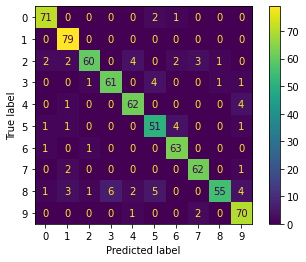

In [32]:
best_knn.confusion_matrix()